<a href="https://colab.research.google.com/github/iknml/dummy-for-git/blob/main/SGD_In_Actions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
mean = np.array([4.0, 5.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 5000)

In [91]:
data.shape

(5000, 2)

In [92]:
data[:5]

array([[5.59136221, 6.77346522],
       [3.39914374, 4.50055943],
       [4.37479247, 4.90249807],
       [4.53164696, 5.020648  ],
       [3.13969409, 4.40842672]])

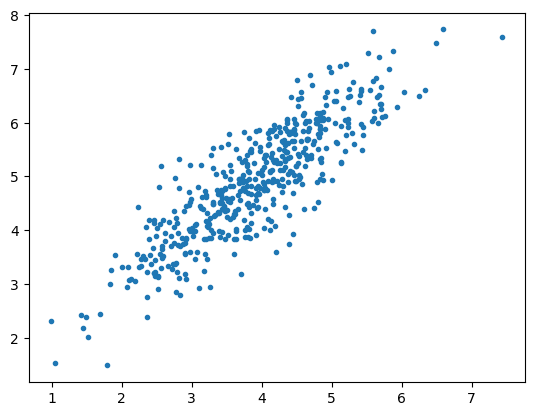

In [93]:
#visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker = '.')
plt.show()

In [94]:
data =np.hstack((np.ones((date.shape[0], 1)), date))

In [95]:
data[:5]

array([[1.        , 2.97225834, 4.70842024],
       [1.        , 4.64122399, 5.21001502],
       [1.        , 6.04356722, 7.20649161],
       [1.        , 5.58198551, 6.50976565],
       [1.        , 4.7370307 , 5.69978864]])

In [96]:
X = data[: ,:-1]
y = data[:, -1].reshape(-1, 1)

In [97]:
X

array([[1.        , 2.97225834],
       [1.        , 4.64122399],
       [1.        , 6.04356722],
       ...,
       [1.        , 4.23283528],
       [1.        , 4.36714023],
       [1.        , 4.87234163]])

In [98]:
y

array([[4.70842024],
       [5.21001502],
       [7.20649161],
       ...,
       [5.70690898],
       [5.36069458],
       [5.45670961]])

Model Function

In [99]:
def predict(X, weight):
  return np.dot(X, weight)

In [100]:
def gredient (X, y, weight):
  y_pred = predict(X, weight)
  gred = np.dot(X.transpose(), (y_pred - y))
  return gred

In [101]:
#loss functions
def cost(X, y, weight):
  y_pred = predict(X, weight)
  e = np.mean((y-y_pred)**2)

  return e

In [102]:
#mini batches for SGD

def create_mini_batches(X, y, batch_size):

  mini_batches = []
  data = np.hstack((X, y))


  np.random.shuffle(data)
  minibatch_count = data.shape[0] // batch_size

  i = 0

  for i in range(minibatch_count +1):
    mini_batch = data[i * batch_size: (i + 1)*batch_size, :]
    X_minibatch = mini_batch[:, :-1]
    Y_minibatch = mini_batch[:, -1].reshape((-1, 1))
    mini_batches.append((X_minibatch, Y_minibatch))


    return mini_batches


In [115]:
# function to perform mini-batch gredient descent
def gradientDescent(X, y, learning_rate = 0.0001, batch_size = 32):
    weight = np.zeros((X.shape[1], 1))
    error_list = []
    max_iters = 400

    for itr in range(max_iters):

        mini_batches = create_mini_batches(X, y, batch_size)

        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            weight = weight - learning_rate * gredient(X_mini, y_mini, weight)
            error_list.append(cost(X_mini, y_mini, weight))

    return weight, error_list

w_0 =  [0.33497738]
w_1 =  [[1.14738212]]


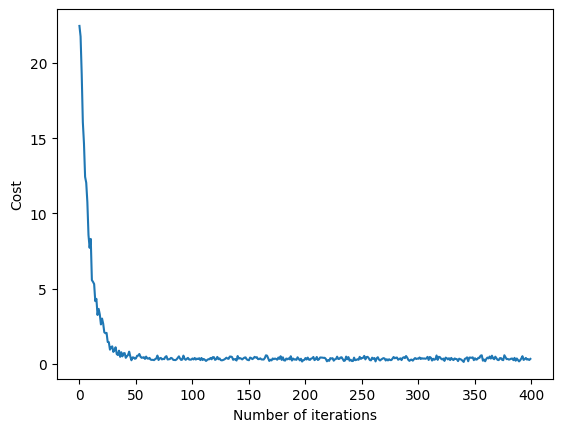

In [116]:
weight, error_list = gradientDescent(X, y)
print("w_0 = ", weight[0])
print("w_1 = ", weight[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()